<a href="https://colab.research.google.com/github/Homeash-github/Python/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

data=pd.read_csv("/content/TATAMOTORS.NS.csv")

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-26,329.899994,335.950012,326.000000,330.250000,330.250000,16647689
1,2018-04-27,333.000000,337.649994,331.049988,336.899994,336.899994,8804236
2,2018-04-30,338.500000,342.750000,337.250000,340.399994,340.399994,5937740
3,2018-05-02,349.200012,351.649994,335.000000,336.049988,336.049988,16022148
4,2018-05-03,335.500000,335.899994,329.149994,333.500000,333.500000,6870513
...,...,...,...,...,...,...,...
1229,2023-04-19,473.000000,475.500000,467.850006,469.399994,469.399994,7368610
1230,2023-04-20,473.700012,479.700012,469.399994,476.799988,476.799988,14264206
1231,2023-04-21,476.700012,476.700012,467.200012,471.200012,471.200012,8478118
1232,2023-04-24,471.200012,476.000000,468.299988,475.200012,475.200012,8020593


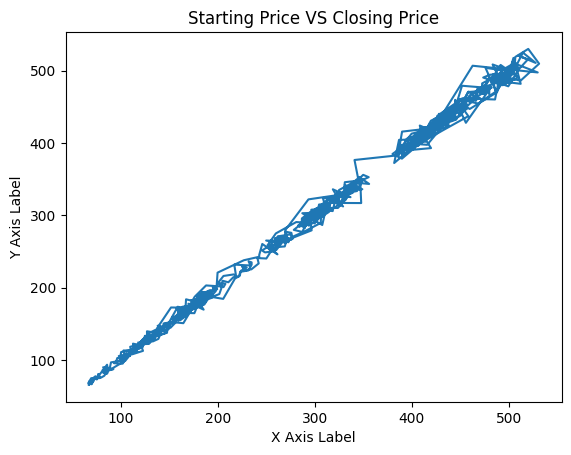

In [ ]:
op=data["Open"]
cl=data["Close"]
# print(type(op))
op_list=op.tolist()
cl_list=cl.tolist()
# fig = plt.figure(figsize=(10, 1))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Starting Price VS Closing Price')
ax.set_xlabel('X Axis Label')
ax.set_ylabel('Y Axis Label')
x=op_list[0:10]
y=cl_list[0:10]
ax.plot(op_list,cl_list)
# ax.plot(op_list,cl_list,markersize=10)
# ax.set_xlim(500, 550)
plt.show()

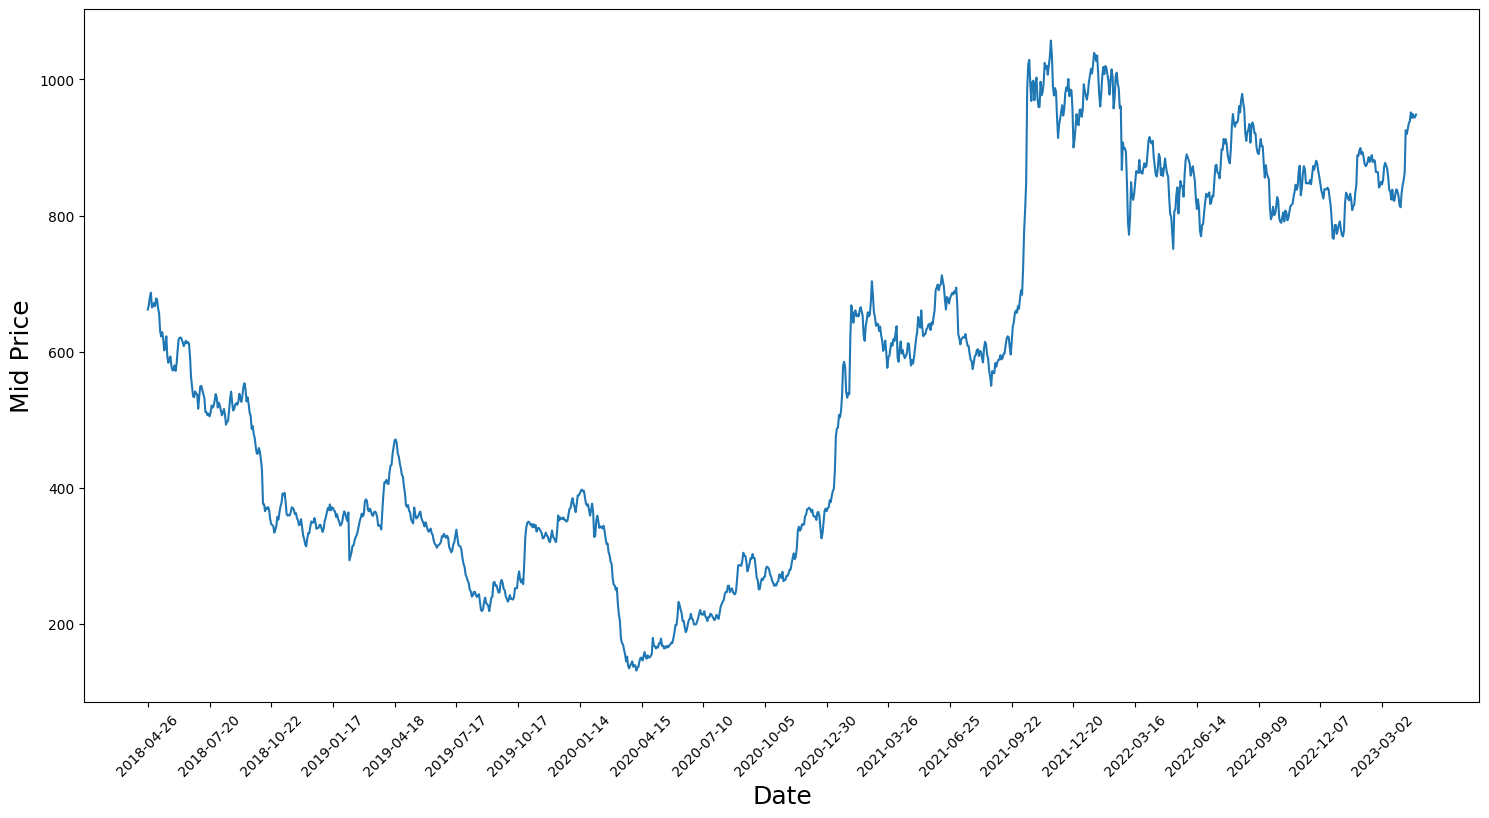

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),(data['Low']+data['High'])/1.0)
plt.xticks(range(0,data.shape[0],60),data['Date'].loc[::60],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()


In [ ]:
high_prices = data.loc[:,'High'].to_numpy()
low_prices = data.loc[:,'Low'].to_numpy()
mid_prices = (high_prices+low_prices)/2.0

In [ ]:
train_data = mid_prices[:1000] # value of train data(1100)
test_data = mid_prices[1000:]
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [ ]:
# scaler.fit(train_data[1:1+2501])

In [ ]:
smoothing_window_size = 50
for di in range(0,900,smoothing_window_size): # value should be less than value of train data
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])


In [ ]:
train_data = train_data.reshape(-1)
test_data = scaler.transform(test_data).reshape(-1)

In [ ]:
EMA = 0.0
gamma = 0.1
for ti in range(1000):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [ ]:
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = data.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))


MSE error for standard averaging: 0.02522


In [ ]:
# std_avg_predictions

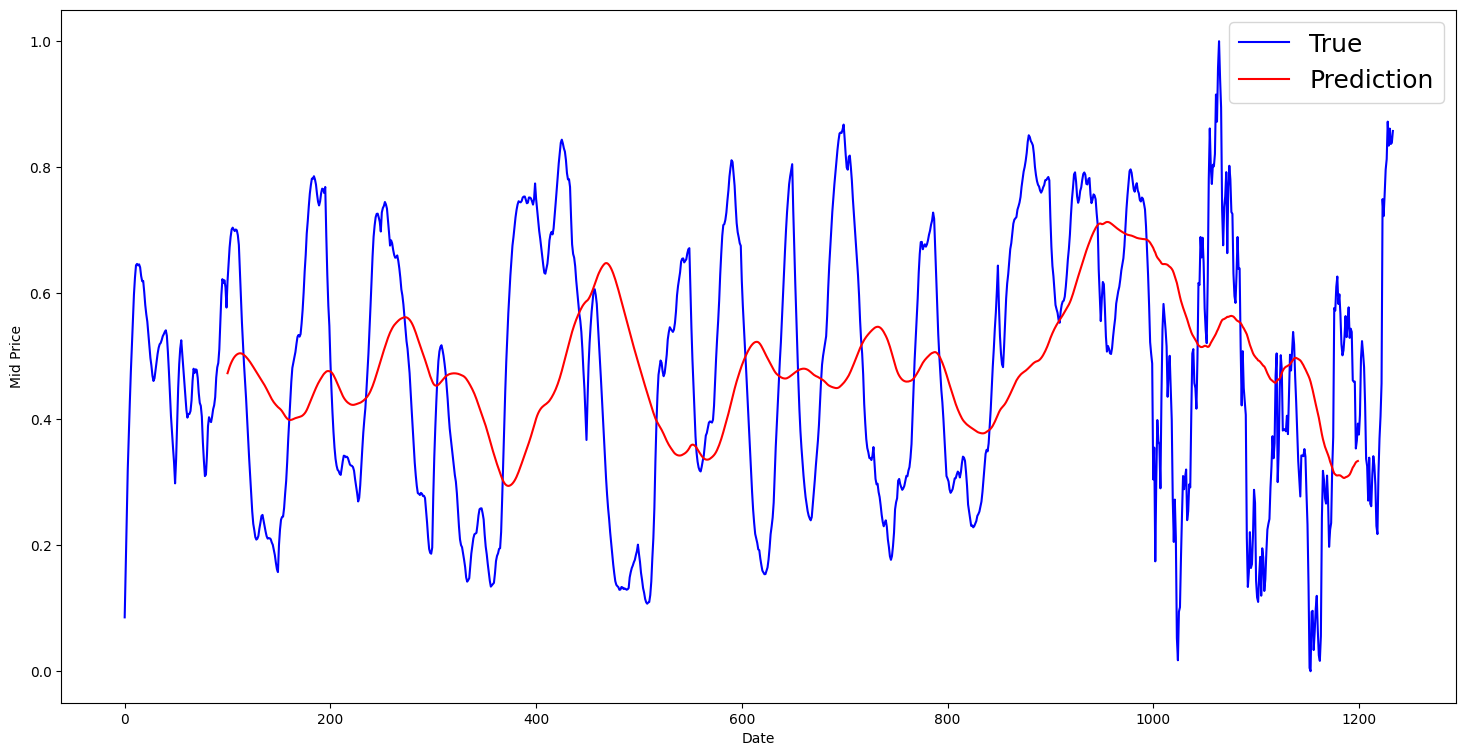

In [ ]:

plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='red',label='Prediction')
#plt.xticks(range(0,df.shape[0],75),df['Date'].loc[::75],rotation=35)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()


In [ ]:
# all_mid_data


In [ ]:
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))


MSE error for EMA averaging: 0.00123


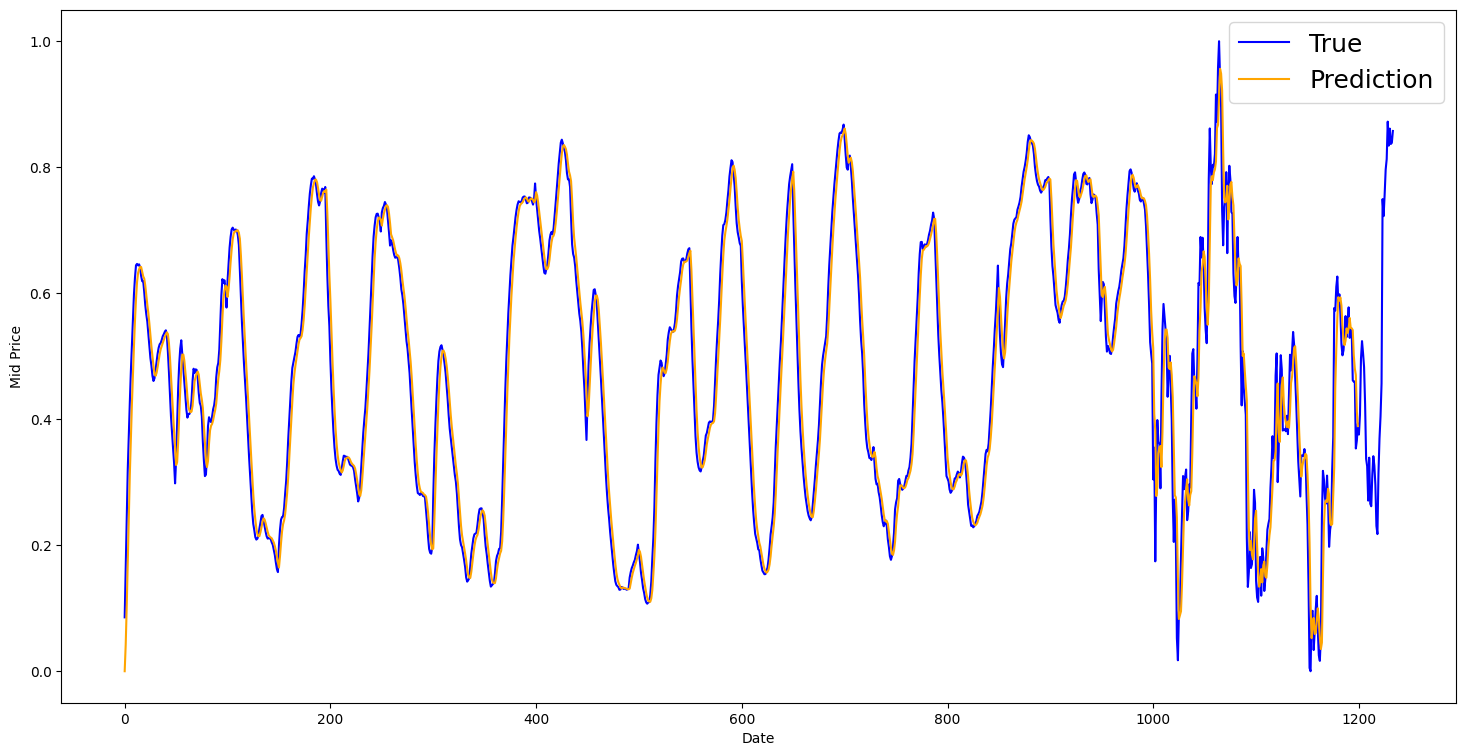

In [ ]:

plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()


In [ ]:
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))


MSE error for EMA averaging: 0.00123


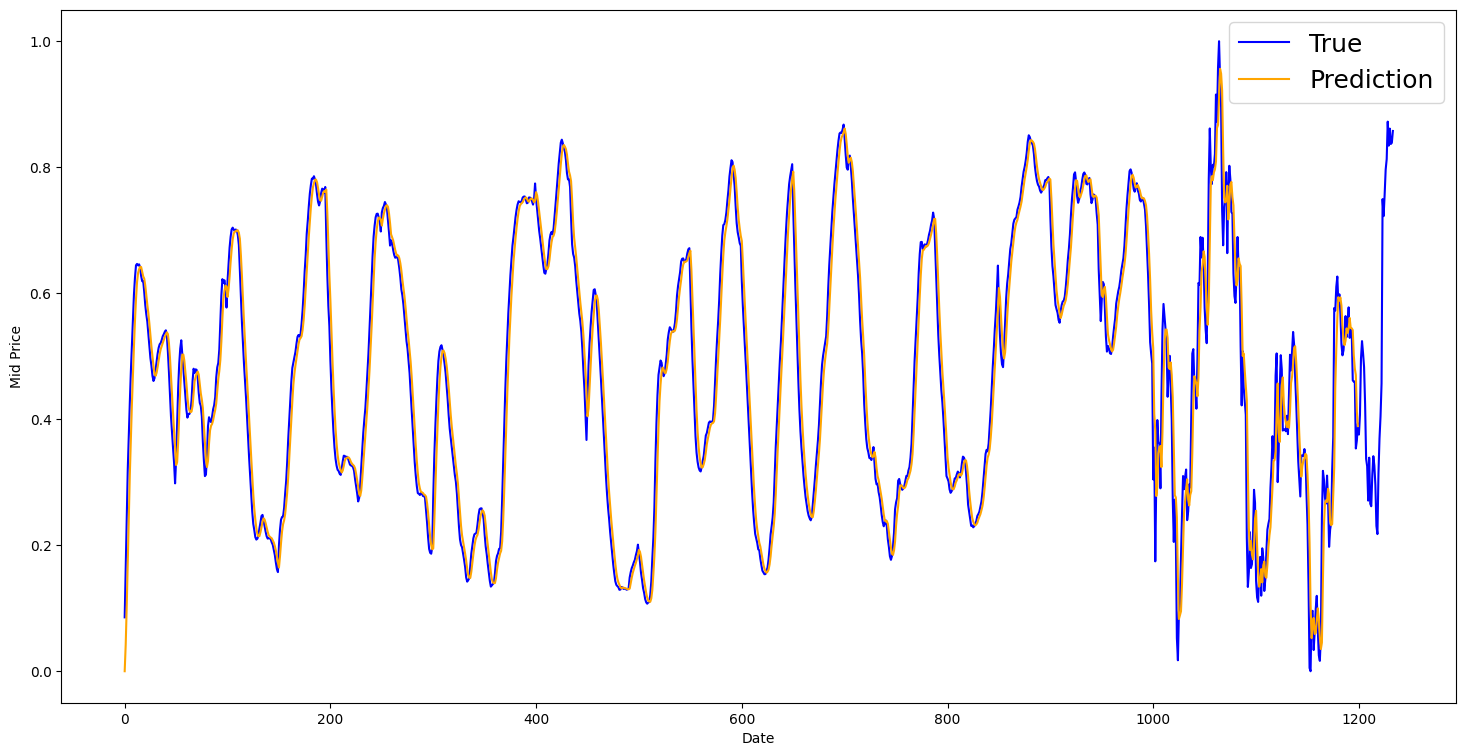

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()